In [ ]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# importar um arquivo do excel
df = pd.read_csv('MKT.csv')

# análise descritiva das variaveis
print(df.head())


   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


In [ ]:
# análise descritiva das variaveis
data_types = df.dtypes
print(data_types)

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object


In [ ]:
# análise descritiva das variaveis
missing_values = df.isnull().sum()
print(missing_values)

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


In [ ]:
# análise descritiva das variaveis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None


In [ ]:
# análise descritiva das variaveis
stats = df.describe()
print(stats)

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


In [ ]:
# análise descritiva das variaveis
print(df.corr())

            youtube  facebook  newspaper     sales
youtube    1.000000  0.086538   0.110759  0.782030
facebook   0.086538  1.000000   0.293425  0.602918
newspaper  0.110759  0.293425   1.000000  0.254987
sales      0.782030  0.602918   0.254987  1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

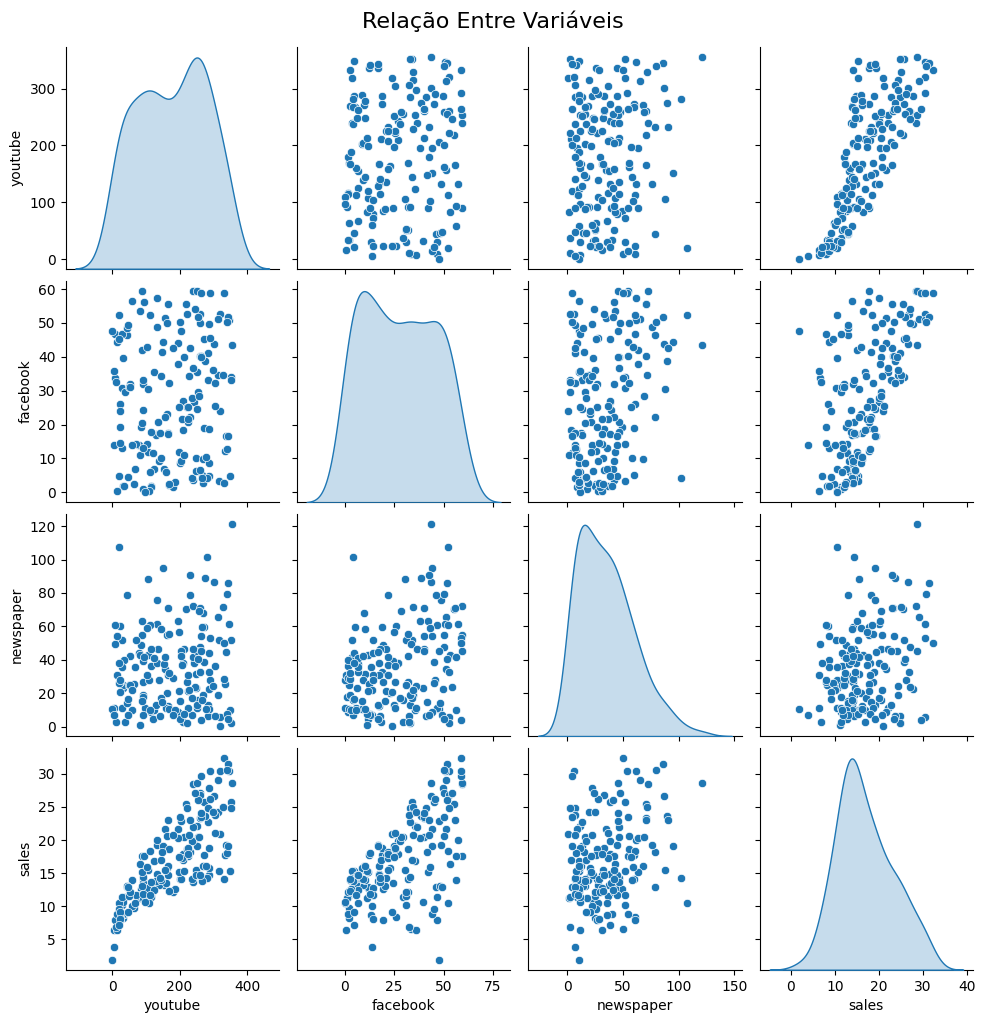

In [ ]:
# análise exploratoria das variaveis
sns.pairplot(df, diag_kind="kde", markers="o", palette="coolwarm")
plt.suptitle("Relação Entre Variáveis", fontsize=16, y=1.02)
plt.show()

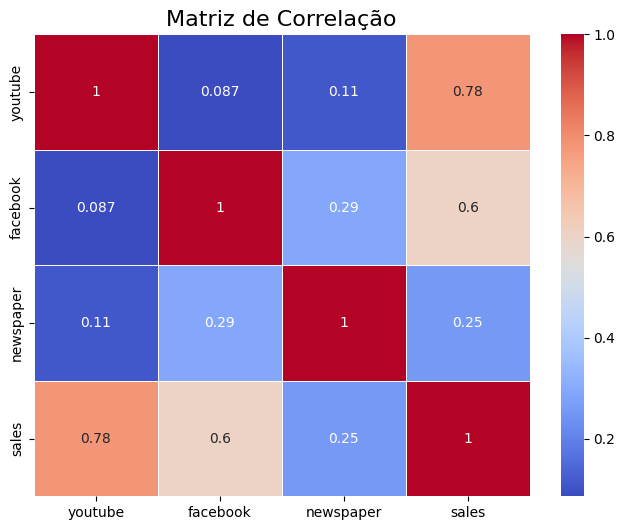

In [ ]:
# análise exploratoria das variaveis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

In [ ]:
# modelagem
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# modelagem
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# modelagem
y_pred = modelo.predict(X_test)

In [ ]:
# modelagem
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# modelagem
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.8729
MAE: 1.40
RMSE: 2.36


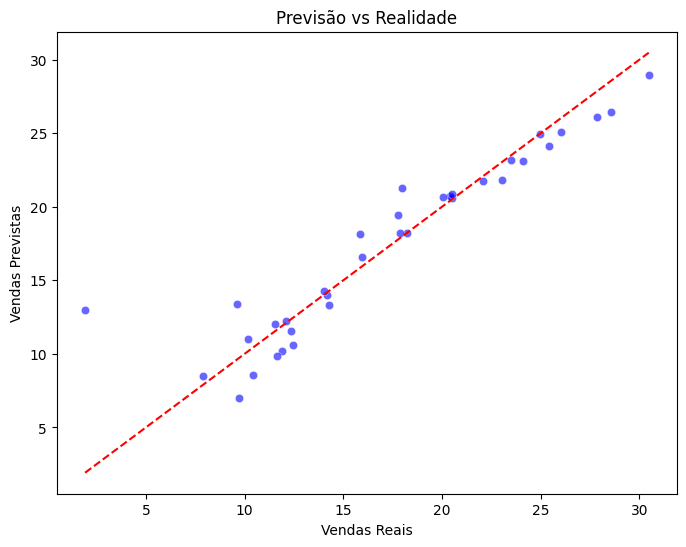

In [ ]:
# modelagem
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Previstas")
plt.title("Previsão vs Realidade")
plt.show()

In [ ]:
# Exemplo de cenários de investimento em marketing
cenarios_investimento = [
    [100, 20, 30],
    [200, 50, 10],
    [50, 10, 5],
    [300, 100, 50]
]

for i, cenario in enumerate(cenarios_investimento, 1):
    vendas_previstas = modelo.predict([cenario])
    print(f"Cenário {i}: Investimento (youTube={cenario[0]}, facebook={cenario[1]}, newspaper={cenario[2]}) -> Vendas Previstas: {vendas_previstas[0]:.2f}")

Cenário 1: Investimento (youTube=100, facebook=20, newspaper=30) -> Vendas Previstas: 12.01
Cenário 2: Investimento (youTube=200, facebook=50, newspaper=10) -> Vendas Previstas: 22.26
Cenário 3: Investimento (youTube=50, facebook=10, newspaper=5) -> Vendas Previstas: 7.86
Cenário 4: Investimento (youTube=300, facebook=100, newspaper=50) -> Vendas Previstas: 36.40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Análise de impacto de investimento em cada canal
impacto_youtube = modelo.coef_[0]
impacto_facebook = modelo.coef_[1]
impacto_newspaper = modelo.coef_[2]

print(f"\nImpacto de cada canal nas vendas:")
print(f"Investimento em YouTube: {impacto_youtube:.4f} (por unidade investida)")
print(f"Investimento em Facebook: {impacto_facebook:.4f} (por unidade investida)")
print(f"Investimento em Newspaper: {impacto_newspaper:.4f} (por unidade investida)")


Impacto de cada canal nas vendas:
Investimento em YouTube: 0.0442 (por unidade investida)
Investimento em Facebook: 0.1945 (por unidade investida)
Investimento em Newspaper: -0.0000 (por unidade investida)


<ipython-input-77-0fe7111f86da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canais, y=impactos, palette="viridis")


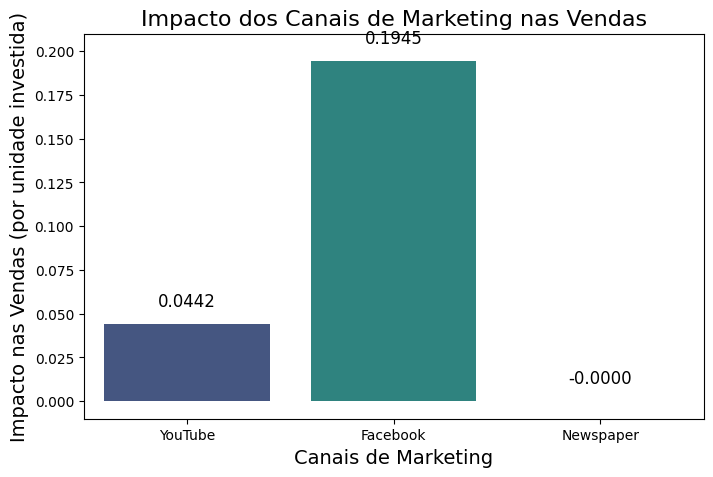

In [ ]:
# mostrando os cenarios de melhor forma
plt.figure(figsize=(8, 5))
sns.barplot(x=canais, y=impactos, palette="viridis")
plt.title("Impacto dos Canais de Marketing nas Vendas", fontsize=16)
plt.xlabel("Canais de Marketing", fontsize=14)
plt.ylabel("Impacto nas Vendas (por unidade investida)", fontsize=14)
plt.ylim(-0.01, 0.21)

for i, impacto in enumerate(impactos):
    plt.text(i, impacto + 0.01, f"{impacto:.4f}", ha='center', fontsize=12)

plt.show()

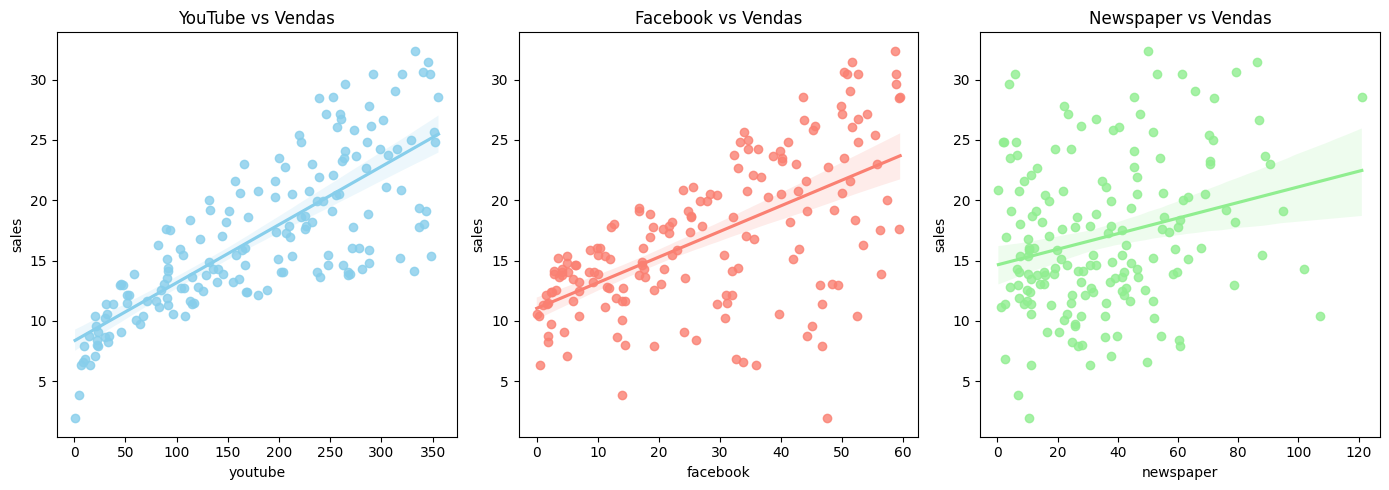

In [ ]:
# Gráfico de dispersão com linha de tendência para cada canal
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='youtube', y='sales', data=df, color='skyblue')
plt.title('YouTube vs Vendas')

plt.subplot(1, 3, 2)
sns.regplot(x='facebook', y='sales', data=df, color='salmon')
plt.title('Facebook vs Vendas')

plt.subplot(1, 3, 3)
sns.regplot(x='newspaper', y='sales', data=df, color='lightgreen')
plt.title('Newspaper vs Vendas')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-44047ec1a473>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

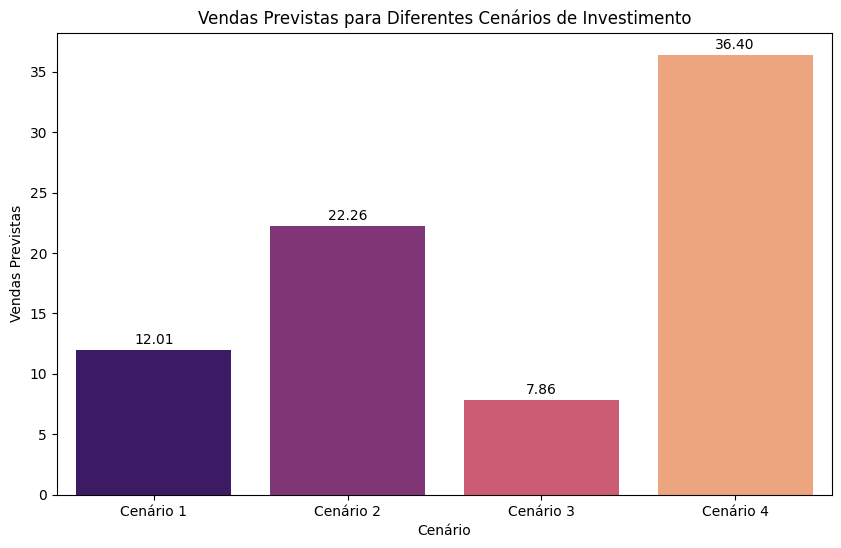

In [ ]:
# Gráfico de barras para os cenários de investimento
cenarios_investimento = [
    [100, 20, 30],
    [200, 50, 10],
    [50, 10, 5],
    [300, 100, 50]
]
vendas_previstas = [modelo.predict([cenario])[0] for cenario in cenarios_investimento]

plt.figure(figsize=(10, 6))
sns.barplot(x=range(1, len(cenarios_investimento) + 1), y=vendas_previstas, palette="magma")
plt.title('Vendas Previstas para Diferentes Cenários de Investimento')
plt.xlabel('Cenário')
plt.ylabel('Vendas Previstas')
plt.xticks(range(len(cenarios_investimento)), [f'Cenário {i+1}' for i in range(len(cenarios_investimento))])

for i, v in enumerate(vendas_previstas):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center')

plt.show()